In [18]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

In [35]:
# Load the dataset
dataset_path = "/content/water_potability.csv"
df = pd.read_csv(dataset_path)

In [36]:
# Data Preprocessing: Handling missing values
df.fillna(df.mean(), inplace=True)

In [37]:
# Splitting features and target
X = df.drop(columns=["Potability"])
y = df["Potability"]

In [38]:
# Scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [39]:
# Splitting data into training (70%), validation (15%), and testing (15%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


In [40]:

# Building a Neural Network model with Batch Normalization, L2 Regularization, and Nadam Optimizer
def build_model():
    model = keras.Sequential([
        layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.005)),  # L2 regularization
        layers.BatchNormalization(),  # Batch Normalization after the first layer
        layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.005)),  # L2 regularization
        layers.BatchNormalization(),  # Batch Normalization after the second layer
        layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer=keras.optimizers.Nadam(learning_rate=0.001),  # Nadam optimizer
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

In [41]:
# Instantiate and train the model
model = build_model()
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=32, callbacks=[early_stopping])


Epoch 1/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.5156 - loss: 1.2807 - val_accuracy: 0.6456 - val_loss: 1.0994
Epoch 2/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6316 - loss: 1.0706 - val_accuracy: 0.6436 - val_loss: 1.0303
Epoch 3/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6787 - loss: 0.9867 - val_accuracy: 0.6599 - val_loss: 0.9868
Epoch 4/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6790 - loss: 0.9403 - val_accuracy: 0.6456 - val_loss: 0.9526
Epoch 5/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7207 - loss: 0.8873 - val_accuracy: 0.6578 - val_loss: 0.9276
Epoch 6/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7210 - loss: 0.8413 - val_accuracy: 0.6558 - val_loss: 0.9006
Epoch 7/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7207 - loss: 0.8135 - val_accuracy: 0.6415 - val_loss: 0.8945
Epoch 8/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7462 - loss: 0.7702 - val_accuracy: 0.6660 - val_loss:

In [42]:
# Evaluate the model
y_pred = (model.predict(X_test) > 0.5).astype("int32")
report = classification_report(y_test, y_pred)
print(report)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
              precision    recall  f1-score   support

           0       0.69      0.83      0.76       307
           1       0.58      0.39      0.47       185

    accuracy                           0.66       492
   macro avg       0.64      0.61      0.61       492
weighted avg       0.65      0.66      0.65       492



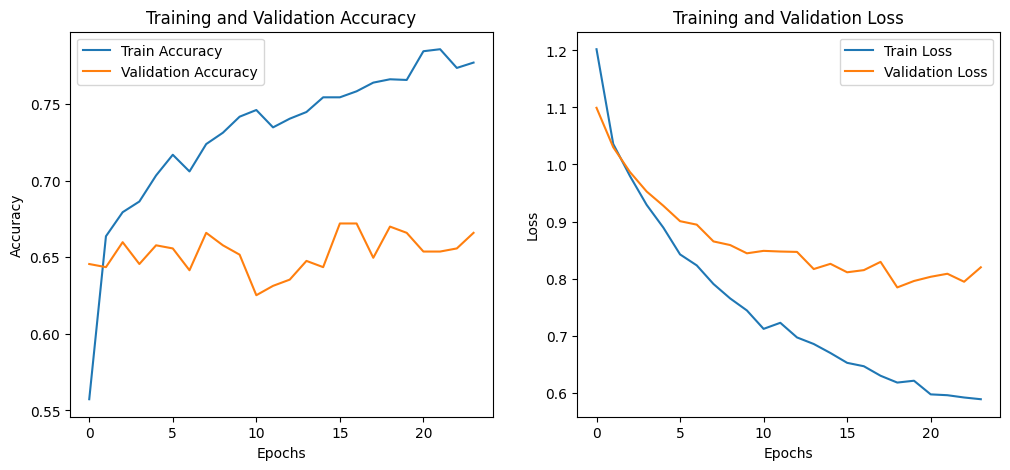

In [43]:

# Plot training and validation accuracy and loss
plt.figure(figsize=(12, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.show()
